In [2]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy
import statistics
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import math
import glob
import os

In [3]:
# disparity = np.load('dispimage_4.npy')
disparity = np.load('image_2.npy')
# disparit = cv2.imread('DISPARITYimage20.png')
# disparity = cv2.cvtColor(disparit, cv2.COLOR_BGR2GRAY)
# print(disparity)
disparity3d = np.copy(disparity)
# plt.imshow(disparity, "gray")
# plt.colorbar()
# plt.show()
sum_dis = 0
disp_no =0
width1 = disparity.shape[1]
height1 = disparity.shape[0]

min_d = (882.5 * 7.5) / 190
max_d = 190

for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j]>=min_d and disparity[i][j]<=max_d :
            sum_dis= sum_dis + disparity[i][j]
            disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
print(avg_dis)

d1=[]
for i in range(height1):
    for j in range(width1):
        d1.append(disparity[i][j])

for i in range(disparity3d.shape[0]):
    for j in range(disparity3d.shape[1]):
        if disparity[i][j]<min_d or disparity[i][j]>max_d :
            disparity3d[i][j] = int(avg_dis)
#             disparity3d[i][j] = float("NaN")
# plt.imshow(disparity3d, "gray")
# plt.colorbar()
# plt.show()

# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax.set_title('Robust Regression')
# ax.plot_surface(h1,w1 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# # ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# #zp = fun(cfs , np.array(x3d), np.array(y3d))
# # ax.scatter3D(x3d, y3d, z3d)
# plt.show()


wt=[]
ht=[]
dt=[]

for i in range(height1):
    for j in range(width1):
        dt.append(disparity3d[i][j])
        wt.append(i)
        ht.append(j)

# fig = plt.figure(figsize =(21, 9))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Scatter')
# ax.set_xlabel('y')
# ax.set_ylabel('x')
# ax.set_zlabel('z')
# ax.scatter(ht,wt , dt)
# plt.show()

73.13891838592232


In [7]:
disparity1 = np.zeros((height1,width1))

w=[]
h=[]
d=[]
w1=[]
h1=[]
d1=[]

# for i in range(height1):
#     for j in range(width1):
#         disparity1[i][j] == disparity3d[i][j]
#         d.append(disparity3d[i][j])
#         w.append(i)
#         h.append(j)
# print(len(d))
for i in range(height1):
    for j in range(width1):
        w1.append(i)
        h1.append(j)
        if(disparity3d[i][j] == int(avg_dis) and disparity[i][j]!= int(avg_dis)):
            disparity1[i][j]= disparity3d[i][j]
        else:
            d.append(disparity3d[i][j])
            w.append(i)
            h.append(j)
#         d.append(disparity3d[i][j])
# print(avg_dis)
# print(len(d))

# d.pop(int(avg_dis))
# print(len(w))

# fig = plt.figure(figsize =(21, 9))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Scatter')
# ax.set_xlabel('y')
# ax.set_ylabel('x')
# ax.set_zlabel('z')
# ax.scatter(h,w , d)
# plt.show()

def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf0 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(w), np.array(h)), np.array(d)))

x1 = np.linspace(0, width1, 32)

y1 = np.linspace(0, height1, 32)

xv, yv = np.meshgrid(x1, y1)
cfs = res_robust.x
# print(cfs)
zv =fun_z(cfs, xv, yv)
z1 =zv.flatten()
# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax.set_title('Robust Regression')
# # ax.scatter(h,w,d)
# # ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# ax.plot_surface(yv,xv,zv,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# #zp = fun(cfs , np.array(x3d), np.array(y3d))
# # ax.scatter3D(x3d, y3d, z3d)
# plt.show()

In [8]:
# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax.set_title('Robust Regression')
w2 =np.reshape(w1,(height1,width1))
h2 =np.reshape(h1,(height1,width1))
# # ax.scatter(xv,yv ,zv)
# # ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# ax.plot_surface(h2,w2 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# #zp = fun(cfs , np.array(x3d), np.array(y3d))
# # ax.scatter3D(x3d, y3d, z3d)
# plt.show()

zv =fun_z(cfs, w2, h2)
diff =np.array(disparity) - np.array(zv)
# diff =np.array(disparity3d) - np.array(zv)
# print(diff[300][250])
# plt.imshow(diff, "gray")
# plt.colorbar()
# plt.show()
# Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax.set_title('Robust Regression')
# ax.plot_surface(h1,w1 ,diff,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# #zp = fun(cfs , np.array(x3d), np.array(y3d))
# # ax.scatter3D(x3d, y3d, z3d)
# plt.show()

In [9]:
min_d = (882.5 * 7.5) / 190
max_d = 190

diff_2 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        diff_2[i][j] = diff[i][j]
        
for i in range(height1):
    for j in range(width1):
        if diff_2[i][j] >0:
            diff_2[i][j] = 0
# plt.imshow(diff_2, "gray")
# plt.colorbar()
# plt.show()

diff_4 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        diff_4[i][j] = diff_2[i][j]
        
for i in range(height1):
    for j in range(width1):
        if(disparity[i][j]< min_d or disparity[i][j]> max_d):
            diff_4[i][j] = 0
# plt.imshow(diff_4, "gray")
# plt.colorbar()
# plt.show()

sumc =0
noc = 0
for i in range(height1):
    for j in range(width1):
#         if(disparity[i][j] >= min_d and disparity[i][j] <= max_d):
        sumc= sumc + diff_4[i][j]
#         sumb= sumb + img_mask[i][j]
        if(diff_4[i][j] != 0):
            noc = noc +1
avgc = sumc / noc
# print(avgc)

d = diff_4.flatten()
e=max(d)
# print(e)

In [10]:
diff_3 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        diff_3[i][j] = diff_2[i][j]
for i in range(disparity3d.shape[0]):
    for j in range(disparity3d.shape[1]):
        if(diff_4[i][j] <= (avgc)):
            diff_3[i][j] =0 
        else:
            diff_3[i][j] =1
# plt.imshow(diff_3 , 'gray')
# plt.colorbar()
# plt.show()

In [11]:
kernel2 = np.ones((21, 21), np.uint8)
dst2 = cv2.dilate(diff_3, kernel2, iterations=1)
# plt.imshow(dst2, 'gray')
# plt.colorbar()
# plt.show()

dst3 = cv2.erode(dst2, kernel2, iterations=1)
# plt.imshow(dst3, 'gray')
# plt.colorbar()
# plt.show()

diff_5 = cv2.morphologyEx(dst3, cv2.MORPH_CLOSE, kernel2)
# plt.imshow(diff_5 , 'gray')
# plt.colorbar()
# plt.show()

[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.

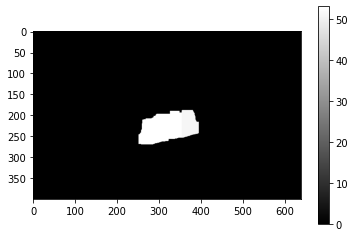

[51.0, 53.0]


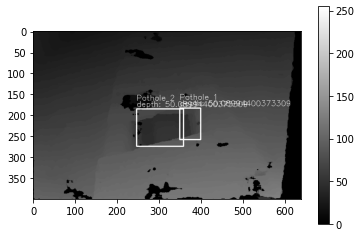

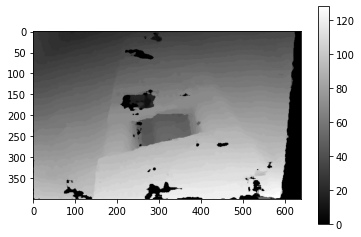

53.0
51.0


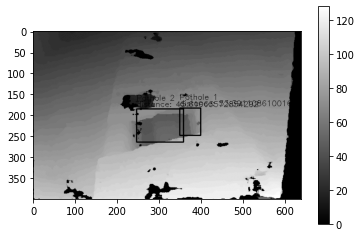

In [25]:
disparity_z = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_z[i][j] = disparity[i][j]
# plt.imshow(disparity_z , 'gray')            
# plt.colorbar()
# plt.show()
for i in range(height1):
    for j in range(width1):
        if(diff_5[i][j] == 0):
            disparity_z[i][j] = 255
# plt.imshow(disparity_z , 'gray')            
# plt.colorbar()
# plt.show()

disparity_pl = np.zeros((height1,width1))
child=[]
mom =[]
a=50
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_z[i][j] == 255):
            if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]==0 ):
                a = a+1
#                 print(a)
                disparity_pl[i][j]=a
            else:
                if(disparity_pl[i-1][j]!=0 or disparity_pl[i][j-1]!=0):
                    if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]!=0):
                        disparity_pl[i][j]=disparity_pl[i][j-1]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]==0):
                        disparity_pl[i][j]=disparity_pl[i-1][j]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]!=0):
                        c = min(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        mo =c
                        disparity_pl[i][j] = c
                        chil = max(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        if mo in child:
#                             if mom[child.index(mo)] not in mom:
                            mom.append(mom[child.index(mo)])
                        else:
#                             if mo not in mom:
                            mom.append(mo)
#                         if chil not in child:
                        child.append(chil)
#                         print(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]), " is a child of ",c)
#                         if max(disparity_pl[i-1][j] , disparity_pl[i][j-1]) not in child:
#                             child.append(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]))
#                         if c not in mom:
#                             mom.append(c)
print(mom)
print(child)
# for i in mom:
#     if i in child:
#         mom.remove(i)
# print(mom)
# cv2.imshow('Contours', disparity_pl)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# # plt.imshow(disparity_pl , 'gray')            
# # plt.colorbar()
# # plt.show()
# print(len(mom))
# print(len(child))
# for i in range(len(mom)):
#     if mom[i] in child:
#         print(mom[i])
#         print(child[i])
#         break
# print(len(mom))
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_pl[i][j] in child):
            disparity_pl[i][j] = mom[child.index(disparity_pl[i][j])]
# cv2.imshow('Contours', disparity_pl)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(disparity_pl , 'gray')            
plt.colorbar()
plt.show()
# # print(disparity_pl)
# # print(child)
# # print(mom)
# count = 0
# for i in range(1,height1):
#     for j in range(1,width1):
#         if(disparity_pl[i][j] != 0 or disparity_pl[i][j] != 1):
#             count= count +1
# print(count)

single = [] 
[single.append(x) for x in mom if x not in single]
print(single)

disparity_rect = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect[i][j] = disparity[i][j]
# plt.imshow(disparity_rect , 'gray')            
# plt.colorbar()
# plt.show()
top=[]
bottom=[]
left =[]
right =[]
sum_calc = 0
d_no = 0
for x in range(len(single)):
    proxy =[]
    proxy2=[]
    for i in range(0,height1):
        for j in range(0,width1):
            if(disparity_pl[i][j] == single[x]):
                proxy.append(i)
                break
    top.append(proxy[0])
    bottom.append(proxy[len(proxy)-1])
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                sum_calc = sum_calc + disparity[i][j]
                d_no = d_no+1
    avg_disp = sum_calc / d_no 
    #Assumption: I encounter the particular label only in one pothole 
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                proxy2.append(j)
                break
    left.append(proxy2[0])
    right.append(proxy2[len(proxy2)-1])
#     for i in range(height1-1, -1):
#         for j in range(0,width1):
#             if(disparity_pl[i][j] == single[x]):
#                 bottom.append[j]
#                 break 
a =1
for x in range(len(single)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]+5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_disp)
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
    disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    a=a+1
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
# cv2.imshow('Contours', disparity_z)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

single1 = []
remove = []
remove=[]
removel=[]
remover=[]
removet=[]
removeb=[]
[single1.append(x) for x in single]
# print(single1)
# print(left)
# print(right)
# print(top)
# print(bottom)
avg =[]
avg_pot=[]
for x in range(len(single)):
#     start_point = (left[x]-5 , top[x]-5)
#     end_point = (right[x]+5 , bottom[x]+5)
#     start_point_txt = (left[x]-5 , top[x]-25)
#     start_point_txt1 = (left[x]-5 , top[x]-10)
#     # Blue color in BGR
#     color = (255, 0, 0)

#     # Line thickness of 2 px
#     thickness = 2
#     txt = 'Pothole '+str(a)
#     txt1 = 'depth: '+str(avg_disp)
#     # Using cv2.rectangle() method
#     # Draw a rectangle with blue line borders of thickness of 2 px
#     disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
#     disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     a=a+1
    sum_final =0
    dis_final_no =0
    sum_final_pot =0
    dis_final_no_pot =0
    for s in range(top[x]-20, bottom[x]+20):
        for r in range(left[x]-20 , right[x]+20):
            if(s < 0 or s >= disparity.shape[0] or r<0 or r>=disparity.shape[1]):
                if single[x] not in remove:
                    remove.append(single[x])
                    removel.append(left[x])
                    remover.append(right[x])
                    removet.append(top[x])
                    removeb.append(bottom[x])
#                 print(single[x])
            else:
                if(disparity_pl[s][r] ==0 and disparity[s][r] != 0):
                    sum_final = sum_final + disparity[s][r]
                    dis_final_no = dis_final_no + 1
                else:
                    sum_final_pot = sum_final_pot + disparity[s][r]
                    dis_final_no_pot = dis_final_no_pot + 1
    avg_dis_final = sum_final / dis_final_no
    avg.append(avg_dis_final)
    avg_dis_final_pot = sum_final_pot / dis_final_no_pot
    avg_pot.append(avg_dis_final_pot)
# print(remove)
# print(avg)
# print(avg_pot)
diff_pot =[]
for x in range(len(avg)):
    difflia = avg[x]-avg_pot[x]
    diff_pot.append(difflia)
# print()
# print(diff_pot)
for i in range(len(remove)):
    single1.remove(remove[i])
    left.remove(removel[i])
    right.remove(remover[i])
    top.remove(removet[i])
    bottom.remove(removeb[i])
# print(single1)

# print(left)
disparity_rect_1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect_1[i][j] = disparity[i][j]
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()

a =1
for x in range(len(single1)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]-5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (0, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'distance: '+str(avg_pot[x])
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect_1 = cv2.rectangle(disparity_rect_1, start_point, end_point, color, thickness)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    a=a+1
print(disparity_pl[250][350])
print(disparity_pl[240][360])
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()

[51.0, 53.0]


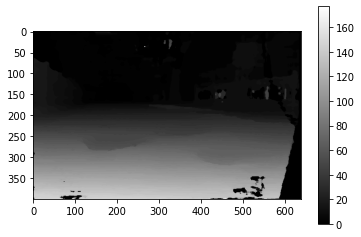

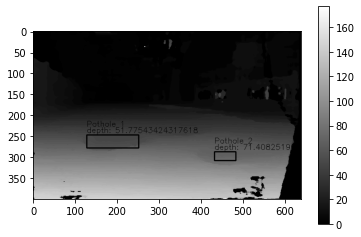

[51.0, 53.0]


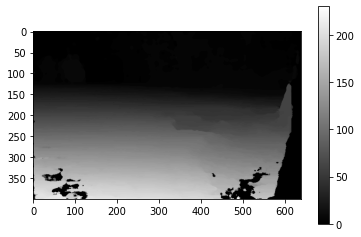

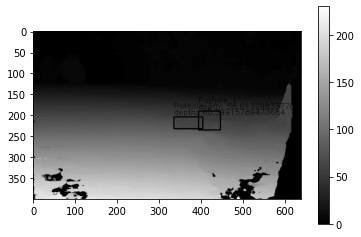

[51.0, 52.0, 53.0]


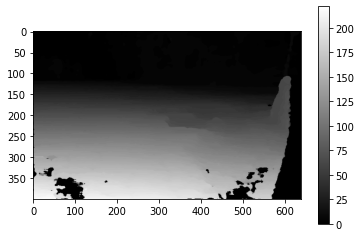

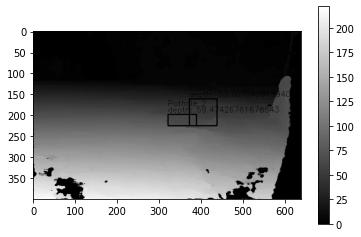

[51.0, 58.0, 60.0, 78.0, 80.0, 84.0, 85.0, 86.0]


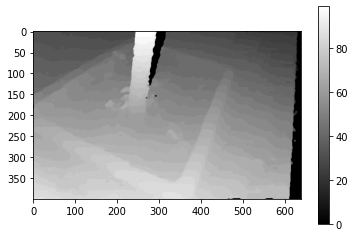

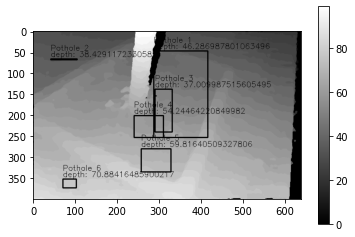

[51.0]


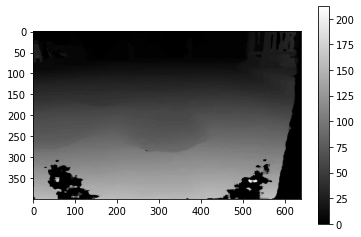

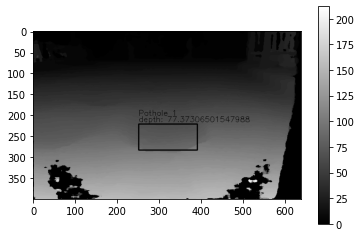

[51.0, 57.0]


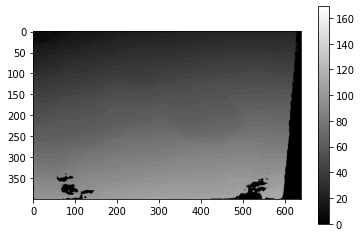

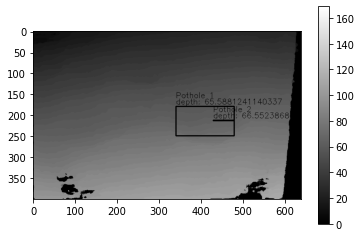

[51.0, 53.0]


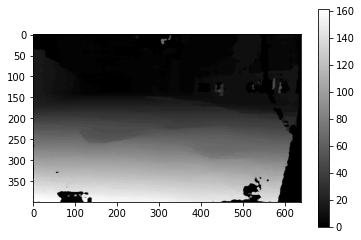

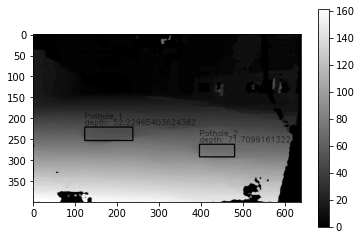

[51.0]


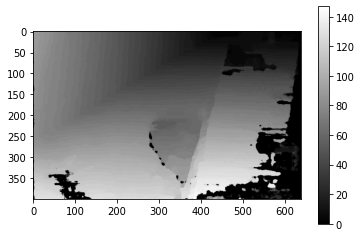

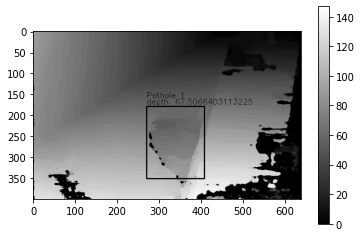

[51.0, 53.0, 55.0, 68.0]


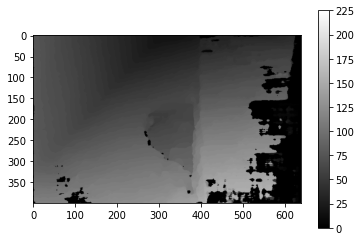

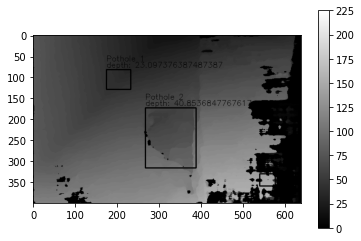

[51.0, 53.0]


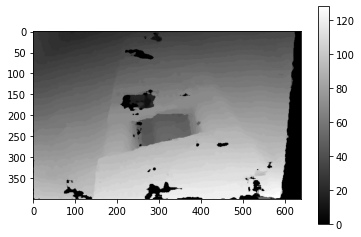

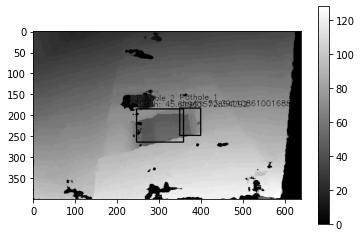

In [193]:
p=0
path = os.path.abspath('SET1') #determining the path of the folder
path1= path+ '/*.npy' 
for filename in glob.glob(path1):
    p = p+1
    # disparity = np.load('dispimage_10.npy')
#     disparity = np.load('image_1.npy')
    disparity = np.load(filename)
    # disparity = np.load('dispimage_4.npy')
    # disparit = cv2.imread('DISPARITYimage20.png')
    # disparity = cv2.cvtColor(disparit, cv2.COLOR_BGR2GRAY)
    # print(disparity)
    disparity3d = np.copy(disparity)
    # plt.imshow(disparity, "gray")
    # plt.colorbar()
    # plt.show()
    sum_dis = 0
    disp_no =0
    width1 = disparity.shape[1]
    height1 = disparity.shape[0]

    min_d = (882.5 * 7.5) / 190
    max_d = 190

    for i in range(disparity.shape[0]):
        for j in range(disparity.shape[1]):
            if disparity[i][j]>=min_d and disparity[i][j]<=max_d :
                sum_dis= sum_dis + disparity[i][j]
                disp_no = disp_no + 1
    avg_dis = sum_dis/disp_no
#     print(avg_dis)

    d1=[]
    for i in range(height1):
        for j in range(width1):
            d1.append(disparity[i][j])

    for i in range(disparity3d.shape[0]):
        for j in range(disparity3d.shape[1]):
            if disparity[i][j]<min_d or disparity[i][j]>max_d :
                disparity3d[i][j] = int(avg_dis)
    #             disparity3d[i][j] = float("NaN")
    # plt.imshow(disparity3d, "gray")
    # plt.colorbar()
    # plt.show()

    # fig = plt.figure(figsize =(14, 9))
    # ax = plt.axes(projection ='3d')
    # ax.set_title('Robust Regression')
    # ax.plot_surface(h1,w1 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # # ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # #zp = fun(cfs , np.array(x3d), np.array(y3d))
    # # ax.scatter3D(x3d, y3d, z3d)
    # plt.show()


    wt=[]
    ht=[]
    dt=[]

    for i in range(height1):
        for j in range(width1):
            dt.append(disparity3d[i][j])
            wt.append(i)
            ht.append(j)

    # fig = plt.figure(figsize =(21, 9))
    # ax = fig.add_subplot(111, projection='3d')
    # ax.set_title('Scatter')
    # ax.set_xlabel('y')
    # ax.set_ylabel('x')
    # ax.set_zlabel('z')
    # ax.scatter(ht,wt , dt)
    # plt.show()

    disparity1 = np.zeros((height1,width1))

    w=[]
    h=[]
    d=[]
    w1=[]
    h1=[]
    d1=[]

    # for i in range(height1):
    #     for j in range(width1):
    #         disparity1[i][j] == disparity3d[i][j]
    #         d.append(disparity3d[i][j])
    #         w.append(i)
    #         h.append(j)
    # print(len(d))
    for i in range(height1):
        for j in range(width1):
    #         w.append(i)
    #         h.append(j)
            if(disparity3d[i][j] == int(avg_dis) and disparity[i][j]!= int(avg_dis)):
                disparity1[i][j]= disparity3d[i][j]
            else:
                d.append(disparity3d[i][j])
                w.append(i)
                h.append(j)
    #         d.append(disparity3d[i][j])
    # print(avg_dis)
    # print(len(d))

    # d.pop(int(avg_dis))
    # print(len(w))

    # fig = plt.figure(figsize =(21, 9))
    # ax = fig.add_subplot(111, projection='3d')
    # ax.set_title('Scatter')
    # ax.set_xlabel('y')
    # ax.set_ylabel('x')
    # ax.set_zlabel('z')
    # ax.scatter(h,w , d)
    # plt.show()

    def fun_residual(cf, vars, z):
        x, y = vars
        return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

    def fun_z(cf, x, y):

        return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


    # cf0 = np.ones(6)
    cf0 = np.zeros(6)

    res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(w), np.array(h)), np.array(d)))

    x1 = np.linspace(0, width1, 32)

    y1 = np.linspace(0, height1, 32)

    xv, yv = np.meshgrid(x1, y1)
    cfs = res_robust.x
    # print(cfs)
    zv =fun_z(cfs, xv, yv)
    z1 =zv.flatten()
    # # Creating figure
    # fig = plt.figure(figsize =(14, 9))
    # ax = plt.axes(projection ='3d')
    # ax.set_title('Robust Regression')
    # # ax.scatter(h,w,d)
    # # ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # ax.plot_surface(yv,xv,zv,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # #zp = fun(cfs , np.array(x3d), np.array(y3d))
    # # ax.scatter3D(x3d, y3d, z3d)
    # plt.show()

    # # Creating figure
    # fig = plt.figure(figsize =(14, 9))
    # ax = plt.axes(projection ='3d')
    # ax.set_title('Robust Regression')
    # w2 =np.reshape(w,(height1,width1))
    # h2 =np.reshape(h,(height1,width1))
    # # ax.scatter(xv,yv ,zv)
    # # ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # ax.plot_surface(h2,w2 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # #zp = fun(cfs , np.array(x3d), np.array(y3d))
    # # ax.scatter3D(x3d, y3d, z3d)
    # plt.show()

    zv =fun_z(cfs, w2, h2)
    diff =np.array(disparity) - np.array(zv)
    # diff =np.array(disparity3d) - np.array(zv)
    # print(diff[300][250])
    # plt.imshow(diff, "gray")
    # plt.colorbar()
    # plt.show()
    # Creating figure
    # fig = plt.figure(figsize =(14, 9))
    # ax = plt.axes(projection ='3d')
    # ax.set_title('Robust Regression')
    # ax.plot_surface(h1,w1 ,diff,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
    # #zp = fun(cfs , np.array(x3d), np.array(y3d))
    # # ax.scatter3D(x3d, y3d, z3d)
    # plt.show()

    min_d = (882.5 * 7.5) / 190
    max_d = 190

    diff_2 = np.zeros((height1,width1))
    for i in range(height1):
        for j in range(width1):
            diff_2[i][j] = diff[i][j]

    for i in range(height1):
        for j in range(width1):
            if diff_2[i][j] >0:
                diff_2[i][j] = 0
    # plt.imshow(diff_2, "gray")
    # plt.colorbar()
    # plt.show()

    diff_4 = np.zeros((height1,width1))
    for i in range(height1):
        for j in range(width1):
            diff_4[i][j] = diff_2[i][j]

    for i in range(height1):
        for j in range(width1):
            if(disparity[i][j]< min_d or disparity[i][j]> max_d):
                diff_4[i][j] = 0
    # plt.imshow(diff_4, "gray")
    # plt.colorbar()
    # plt.show()

    sumc =0
    noc = 0
    for i in range(height1):
        for j in range(width1):
    #         if(disparity[i][j] >= min_d and disparity[i][j] <= max_d):
            sumc= sumc + diff_4[i][j]
    #         sumb= sumb + img_mask[i][j]
            if(diff_4[i][j] != 0):
                noc = noc +1
    avgc = sumc / noc
    # print(avgc)

    d = diff_4.flatten()
    e=max(d)
    # print(e)

    diff_3 = np.zeros((height1,width1))
    for i in range(height1):
        for j in range(width1):
            diff_3[i][j] = diff_2[i][j]
    for i in range(disparity3d.shape[0]):
        for j in range(disparity3d.shape[1]):
            if(diff_4[i][j] <= (avgc)):
                diff_3[i][j] =0 
            else:
                diff_3[i][j] =1
    # plt.imshow(diff_3 , 'gray')
    # plt.colorbar()
    # plt.show()

    kernel2 = np.ones((21, 21), np.uint8)
    dst2 = cv2.dilate(diff_3, kernel2, iterations=1)
    # plt.imshow(dst2, 'gray')
    # plt.colorbar()
    # plt.show()

    dst3 = cv2.erode(dst2, kernel2, iterations=1)
    # plt.imshow(dst3, 'gray')
    # plt.colorbar()
    # plt.show()

    diff_5 = cv2.morphologyEx(dst3, cv2.MORPH_CLOSE, kernel2)
    # plt.imshow(diff_5 , 'gray')
    # plt.colorbar()
    # plt.show()

    disparity_z = np.zeros((height1,width1))
    for i in range(height1):
        for j in range(width1):
            disparity_z[i][j] = disparity[i][j]
    # plt.imshow(disparity_z , 'gray')            
    # plt.colorbar()
    # plt.show()
    for i in range(height1):
        for j in range(width1):
            if(diff_5[i][j] == 0):
                disparity_z[i][j] = 255
    # plt.imshow(disparity_z , 'gray')            
    # plt.colorbar()
    # plt.show()

    disparity_pl = np.zeros((height1+1,width1+1))
    child=[]
    mom =[]
    a=50
    for i in range(1,height1):
        for j in range(1,width1):
            if(disparity_z[i][j] == 255):
                if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]==0 ):
                    a = a+1
    #                 print(a)
                    disparity_pl[i][j]=a
                else:
                    if(disparity_pl[i-1][j]!=0 or disparity_pl[i][j-1]!=0):
                        if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]!=0):
                            disparity_pl[i][j]=disparity_pl[i][j-1]
                        elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]==0):
                            disparity_pl[i][j]=disparity_pl[i-1][j]
                        elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]!=0):
                            c = min(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                            mo =c
                            disparity_pl[i][j] = c
                            chil = max(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                            if mo in child:
                                mom.append(mom[child.index(mo)])
                            else:
                                mom.append(mo)
                            child.append(chil)
    #                         print(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]), " is a child of ",c)
    #                         if max(disparity_pl[i-1][j] , disparity_pl[i][j-1]) not in child:
    #                             child.append(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]))
    #                         if c not in mom:
    #                             mom.append(c)
    # print(mom)
    # print(child)
    # for i in mom:
    #     if i in child:
    #         mom.remove(i)
    # print(mom)
    # cv2.imshow('Contours', disparity_pl)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # # plt.imshow(disparity_pl , 'gray')            
    # # plt.colorbar()
    # # plt.show()
    for i in range(1,height1):
        for j in range(1,width1):
            if(disparity_pl[i][j] in child):
                disparity_pl[i][j] = mom[child.index(disparity_pl[i][j])]
    # cv2.imshow('Contours', disparity_pl)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # plt.imshow(disparity_pl , 'gray')            
    # plt.colorbar()
    # plt.show()
    # # print(disparity_pl)
    # # print(child)
    # # print(mom)
    # count = 0
    # for i in range(1,height1):
    #     for j in range(1,width1):
    #         if(disparity_pl[i][j] != 0 or disparity_pl[i][j] != 1):
    #             count= count +1
    # print(count)

    single = [] 
    [single.append(x) for x in mom if x not in single]
    print(single)

    disparity_rect = np.zeros((height1,width1))
    for i in range(height1):
        for j in range(width1):
            disparity_rect[i][j] = disparity[i][j]
    # plt.imshow(disparity_rect , 'gray')            
    # plt.colorbar()
    # plt.show()
    top=[]
    bottom=[]
    left =[]
    right =[]
    sum_calc = 0
    d_no = 0
    for x in range(len(single)):
        proxy =[]
        proxy2=[]
        for i in range(0,height1):
            for j in range(0,width1):
                if(disparity_pl[i][j] == single[x]):
                    proxy.append(i)
                    break
        top.append(proxy[0])
        bottom.append(proxy[len(proxy)-1])
        for j in range(0,width1):
            for i in range(0,height1):
                if(disparity_pl[i][j] == single[x]):
                    sum_calc = sum_calc + disparity[i][j]
                    d_no = d_no+1
        avg_disp = sum_calc / d_no 
        #Assumption: I encounter the particular label only in one pothole 
        for j in range(0,width1):
            for i in range(0,height1):
                if(disparity_pl[i][j] == single[x]):
                    proxy2.append(j)
                    break
        left.append(proxy2[0])
        right.append(proxy2[len(proxy2)-1])
    #     for i in range(height1-1, -1):
    #         for j in range(0,width1):
    #             if(disparity_pl[i][j] == single[x]):
    #                 bottom.append[j]
    #                 break 
    a =1
    for x in range(len(single)):
        start_point = (left[x]-5 , top[x]-5)
        end_point = (right[x]+5 , bottom[x]+5)
        start_point_txt = (left[x]-5 , top[x]-25)
        start_point_txt1 = (left[x]-5 , top[x]-10)
        # Blue color in BGR
        color = (255, 0, 0)

        # Line thickness of 2 px
        thickness = 2
        txt = 'Pothole '+str(a)
        txt1 = 'depth: '+str(avg_disp)
        # Using cv2.rectangle() method
        # Draw a rectangle with blue line borders of thickness of 2 px
        disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
        disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
        disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
        a=a+1
    # plt.imshow(disparity_rect , 'gray')            
    # plt.colorbar()
    # plt.show()
    # cv2.imshow('Contours', disparity_z)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    single1 = []
    remove = []
    remove=[]
    removel=[]
    remover=[]
    removet=[]
    removeb=[]
    [single1.append(x) for x in single]
    # print(single1)
    # print(left)
    # print(right)
    # print(top)
    # print(bottom)
    avg =[]
    avg_pot=[]
    for x in range(len(single)):
    #     start_point = (left[x]-5 , top[x]-5)
    #     end_point = (right[x]+5 , bottom[x]+5)
    #     start_point_txt = (left[x]-5 , top[x]-25)
    #     start_point_txt1 = (left[x]-5 , top[x]-10)
    #     # Blue color in BGR
    #     color = (255, 0, 0)

    #     # Line thickness of 2 px
    #     thickness = 2
    #     txt = 'Pothole '+str(a)
    #     txt1 = 'depth: '+str(avg_disp)
    #     # Using cv2.rectangle() method
    #     # Draw a rectangle with blue line borders of thickness of 2 px
    #     disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
    #     disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
    #                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    #     disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
    #                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    #     a=a+1
        sum_final =0
        dis_final_no =0
        sum_final_pot =0
        dis_final_no_pot =0
        for s in range(top[x]-20, bottom[x]+20):
            for r in range(left[x]-20 , right[x]+20):
                if(s < 0 or s >= disparity.shape[0] or r<0 or r>=disparity.shape[1]):
                    if single[x] not in remove:
                        remove.append(single[x])
                        removel.append(left[x])
                        remover.append(right[x])
                        removet.append(top[x])
                        removeb.append(bottom[x])
    #                 print(single[x])
                else:
                    if(disparity_pl[s][r] ==0 and disparity[s][r] != 0):
                        sum_final = sum_final + disparity[s][r]
                        dis_final_no = dis_final_no + 1
                    else:
                        sum_final_pot = sum_final_pot + disparity[s][r]
                        dis_final_no_pot = dis_final_no_pot + 1
        avg_dis_final = sum_final / dis_final_no
        avg.append(avg_dis_final)
        avg_dis_final_pot = sum_final_pot / dis_final_no_pot
        avg_pot.append(avg_dis_final_pot)
    # print(remove)
    # print(avg)
    # print(avg_pot)
    diff_pot =[]
    for x in range(len(avg)):
        difflia = avg[x]-avg_pot[x]
        diff_pot.append(difflia)
    # print()
    # print(diff_pot)
    for i in range(len(remove)):
        single1.remove(remove[i])
        left.remove(removel[i])
        right.remove(remover[i])
        top.remove(removet[i])
        bottom.remove(removeb[i])
    # print(single1)

    # print(left)
    disparity_rect_1 = np.zeros((height1,width1))
    for i in range(height1):
        for j in range(width1):
            disparity_rect_1[i][j] = disparity[i][j]
    plt.imshow(disparity_rect_1 , 'gray')            
    plt.colorbar()
    plt.show()

    a =1
    for x in range(len(single1)):
        start_point = (left[x]-5 , top[x]-5)
        end_point = (right[x]+5 , bottom[x]-5)
        start_point_txt = (left[x]-5 , top[x]-25)
        start_point_txt1 = (left[x]-5 , top[x]-10)
        # Blue color in BGR
        color = (0, 0, 0)

        # Line thickness of 2 px
        thickness = 2
        txt = 'Pothole '+str(a)
        txt1 = 'depth: '+str(avg_pot[x])
        # Using cv2.rectangle() method
        # Draw a rectangle with blue line borders of thickness of 2 px
        disparity_rect_1 = cv2.rectangle(disparity_rect_1, start_point, end_point, color, thickness)
        disparity_rect_1 = cv2.putText(disparity_rect_1, txt , start_point_txt,
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
        disparity_rect_1 = cv2.putText(disparity_rect_1, txt1 , start_point_txt1,
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
        a=a+1
    plt.imshow(disparity_rect_1 , 'gray')            
    plt.colorbar()
    plt.show()
    cv2.imwrite(path + '/'+'Resultwith21Matrix'+ str(p) + '.png',disparity_rect_1)
    cv2.imwrite(path + '/'+'image'+ str(p) + '.png',disparity)